# Introduction
This python notebook will be used for testing out the NZN geomeppy functions

## Importing functions and parameter sets

In [120]:
from besos.parameters import wwr, RangeParameter, FieldSelector, FilterSelector, GenericSelector, Parameter, expand_plist
from parameters import RangeParameter, CategoryParameter, expand_plist

from besos import eppy_funcs as ef
import besos.sampling as sampling
from besos.evaluator import EvaluatorEP
from besos.problem import EPProblem

import copy
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt

In [121]:
import NZN_Office_parameter_set
from NZN_Office_parameter_set import internal_load_parameters
from NZN_Office_parameter_set import IAQ_parameters
from NZN_Office_parameter_set import lighting_parameters
from NZN_Office_parameter_set import architectural_parameters
from NZN_Office_parameter_set import infiltration_parameters
from NZN_Office_parameter_set import service_water_parameters
from NZN_Office_parameter_set import system_parameters
from NZN_Office_parameter_set import FCU_parameters
from NZN_Office_parameter_set import VAV_parameters
from NZN_Office_parameter_set import CB_parameters
from NZN_Office_parameter_set import plant_parameters
from NZN_Office_parameter_set import plant_temperature_parameters
from NZN_Office_parameter_set import plant_efficiency_parameters
from NZN_Office_parameter_set import pump_parameters

# Default Building Generator

In order to provide valid comparison across different sets of parameters, and to systematically QA parameter sets, a default building is generated.
This will also be useful to make sure that there is consistency among idfs used if changes are made to the idf and re-uploaded and not all parameters are used in the parameter set.

### To do
- Add function that changes runperiod to full runtime

In [122]:
#full parameter list

parameters = architectural_parameters()[0]
parameters.extend(internal_load_parameters()[0])
parameters.extend(IAQ_parameters()[0])
parameters.extend(lighting_parameters()[0])
parameters.extend(infiltration_parameters()[0])
parameters.extend(service_water_parameters()[0])
parameters.extend(system_parameters()[0])
parameters.extend(FCU_parameters()[0])
parameters.extend(VAV_parameters()[0])
parameters.extend(CB_parameters()[0])
parameters.extend(plant_parameters()[0])
parameters.extend(plant_temperature_parameters()[0])
parameters.extend(plant_efficiency_parameters()[0])
parameters.extend(pump_parameters()[0])

In [123]:
# parameters.pop(0)

In [124]:
# parameters

In [125]:
#full defaults list

defaults = architectural_parameters()[1]
defaults.update(internal_load_parameters()[1])
defaults.update(IAQ_parameters()[1])
defaults.update(lighting_parameters()[1])
defaults.update(infiltration_parameters()[1])
defaults.update(service_water_parameters()[1])
defaults.update(system_parameters()[1])
defaults.update(FCU_parameters()[1])
defaults.update(VAV_parameters()[1])
defaults.update(CB_parameters()[1])
defaults.update(plant_parameters()[1])
defaults.update(plant_temperature_parameters()[1])
defaults.update(plant_efficiency_parameters()[1])
defaults.update(pump_parameters()[1])

In [126]:
#convert dictionary to dataframe and view.
defaults_df = pd.DataFrame([defaults])
defaults_df

Window to Wall Ratio  Shading Length  Orientation  Wall Insulation  \
0                   0.4            0.01            0             0.09   

   Roof Insulation  Glazing USI  Glazing SHGC  Wall Thermal Mass  \
0             0.15          2.2           0.4               0.01   

   Floor Thermal Mass  Slab Insulation  Occupancy  Plug Loads  Data Loads  \
0                0.15             0.93         25         7.5           0   

   Heating Setpoint  Cooling Setpoint  RH-Low Setpoint  RH-High Setpoint  \
0                21                24               30                60   

   Ventilation Per Occupancy  Ventilation Per Floor Area  \
0                     0.0025                      0.0003   

   Distribution Effectiveness  Overhead Lighting Power Density  \
0                         0.8                                5   

   Task Lighting Power Density  Daylighting Fraction  \
0                            5                   0.5   

   Daylighting Lux Setpoint  Glazing VT  Design Infiltration Rate  \
0                       500         0.7                   0.00025   

   Constant Infiltration Factor  Temperature Infiltration Factor  \
0                             1                                0   

   Wind Infiltration Factor  DHW Peak Flow  Process Peak Flow  \
0                         0        0.00002           0.000001   

   VAV Terminal Sizing  CB Terminal Sizing  FCU Terminal Sizing  \
0                0.001               0.001                    1   

   DOAS Terminal Sizing  Baseboard Sizing  Terminal Fan Pressure  \
0                     1             0.001                    125   

   DOAS Supply Fan Pressure  DOAS Exhaust Fan Pressure  \
0                      1000                        750   

   ERV Sensible Effectiveness  ERV Latent Effectiveness  DOAS Low SAT  \
0                         0.7                       0.5            21   

   DOAS High SAT  Minimum Box Position  Maximum Reheat Position  \
0             21                   0.3                      0.3   

   VAV SAT Reset Low  VAV SAT Reset High  VAV Core Terminal Sizing  \
0                 13                  16                     0.001   

   DOAS CB Supply Fan Pressure  DOAS CB Exhaust Fan Pressure  DOAS CB Low SAT  \
0                         1000                           750               13   

   DOAS CB High SAT  Chiller-1 Sizing  Chiller-2 Sizing  Chiller-3 Sizing  \
0                13             0.001             0.001               0.5   

   Chiller-4 Sizing  Boiler-1 Sizing  Boiler-2 Sizing  ASHP Heating Sizing  \
0               0.5              0.5              0.5                0.001   

   ASHP Cooling Sizing  Waterside Economizer Sizing  Hot Water DeltaT  \
0                0.001                        0.001                20   

   Chilled Water DeltaT  Condenser Water DeltaT  Hot Water Low Temp  \
0                     6                       4                  60   

   Hot Water High Temp  Chilled Water High Temp  Chilled Water Low Temp  \
0                   40                        7                       7   

   Condenser Minimum Lift  Condenser Setpoint WB Offset  \
0                       4                             2   

   Cooling Tower Loop Disable Temperature  \
0                                     -40   

   Free Cooling Loop Enabled Temperature  Chiller-1 COP  Chiller-2 COP  \
0                                      4              5              5   

   Chiller-3 COP  Chiller-4 COP  Boiler-1 Nominal Efficiency  \
0              3              3                         0.82   

   Boiler-2 Nominal Efficiency  ASHP Heating Efficiency  \
0                         0.82                        3   

   ASHP Cooling Efficiency  Chilled Water Head  Hot Water Head  \
0                        3                  60              60   

   Condenser Water Head  Primary Chilled Water Head  Primary Hot Water Head  
0                    60                       0.001                   0.001

In [127]:
# defaults_df=defaults_df.drop(axis=1,labels='Window to Wall Ratio')

In [128]:
defaults_df

Window to Wall Ratio  Shading Length  Orientation  Wall Insulation  \
0                   0.4            0.01            0             0.09   

   Roof Insulation  Glazing USI  Glazing SHGC  Wall Thermal Mass  \
0             0.15          2.2           0.4               0.01   

   Floor Thermal Mass  Slab Insulation  Occupancy  Plug Loads  Data Loads  \
0                0.15             0.93         25         7.5           0   

   Heating Setpoint  Cooling Setpoint  RH-Low Setpoint  RH-High Setpoint  \
0                21                24               30                60   

   Ventilation Per Occupancy  Ventilation Per Floor Area  \
0                     0.0025                      0.0003   

   Distribution Effectiveness  Overhead Lighting Power Density  \
0                         0.8                                5   

   Task Lighting Power Density  Daylighting Fraction  \
0                            5                   0.5   

   Daylighting Lux Setpoint  Glazing VT  Design Infiltration Rate  \
0                       500         0.7                   0.00025   

   Constant Infiltration Factor  Temperature Infiltration Factor  \
0                             1                                0   

   Wind Infiltration Factor  DHW Peak Flow  Process Peak Flow  \
0                         0        0.00002           0.000001   

   VAV Terminal Sizing  CB Terminal Sizing  FCU Terminal Sizing  \
0                0.001               0.001                    1   

   DOAS Terminal Sizing  Baseboard Sizing  Terminal Fan Pressure  \
0                     1             0.001                    125   

   DOAS Supply Fan Pressure  DOAS Exhaust Fan Pressure  \
0                      1000                        750   

   ERV Sensible Effectiveness  ERV Latent Effectiveness  DOAS Low SAT  \
0                         0.7                       0.5            21   

   DOAS High SAT  Minimum Box Position  Maximum Reheat Position  \
0             21                   0.3                      0.3   

   VAV SAT Reset Low  VAV SAT Reset High  VAV Core Terminal Sizing  \
0                 13                  16                     0.001   

   DOAS CB Supply Fan Pressure  DOAS CB Exhaust Fan Pressure  DOAS CB Low SAT  \
0                         1000                           750               13   

   DOAS CB High SAT  Chiller-1 Sizing  Chiller-2 Sizing  Chiller-3 Sizing  \
0                13             0.001             0.001               0.5   

   Chiller-4 Sizing  Boiler-1 Sizing  Boiler-2 Sizing  ASHP Heating Sizing  \
0               0.5              0.5              0.5                0.001   

   ASHP Cooling Sizing  Waterside Economizer Sizing  Hot Water DeltaT  \
0                0.001                        0.001                20   

   Chilled Water DeltaT  Condenser Water DeltaT  Hot Water Low Temp  \
0                     6                       4                  60   

   Hot Water High Temp  Chilled Water High Temp  Chilled Water Low Temp  \
0                   40                        7                       7   

   Condenser Minimum Lift  Condenser Setpoint WB Offset  \
0                       4                             2   

   Cooling Tower Loop Disable Temperature  \
0                                     -40   

   Free Cooling Loop Enabled Temperature  Chiller-1 COP  Chiller-2 COP  \
0                                      4              5              5   

   Chiller-3 COP  Chiller-4 COP  Boiler-1 Nominal Efficiency  \
0              3              3                         0.82   

   Boiler-2 Nominal Efficiency  ASHP Heating Efficiency  \
0                         0.82                        3   

   ASHP Cooling Efficiency  Chilled Water Head  Hot Water Head  \
0                        3                  60              60   

   Condenser Water Head  Primary Chilled Water Head  Primary Hot Water Head  
0                    60                       0.001                   0.001

In [129]:
#Define the overall problem, etc

problem = EPProblem(parameters)
epw_victoria='CAN_BC_VictoriaUniversityCS_offset_from_Victoria-Univ.of.Victoria.717830_CWEC2016.epw'

default_building = ef.get_building('NZN_Medium_Office_Default_8.idf',data_dict='Energy+.idd')
evaluator = EvaluatorEP(problem, default_building,epw = epw_victoria,out_dir='outputs',multi=False)

In [130]:
#This sets the values to defaults in the default building
for p, value in zip(evaluator.problem.inputs, defaults_df.values.tolist()[0]):
    p.transformation_function(default_building, value)

In [131]:
#Ensure we run a full year
default_building.idfobjects['RunPeriod'][0].Begin_Month=1
default_building.idfobjects['RunPeriod'][0].Begin_Day_of_Month=1
default_building.idfobjects['RunPeriod'][0].End_Month=12
default_building.idfobjects['RunPeriod'][0].End_Day_of_Month=31

In [132]:
#Save an idf version of the default building
evaluator.generate_building(defaults_df,index=0,file_name='NZN_Medium_Office_Default')

In [133]:
#Create a deep copy of the building object for analysis.
building = copy.deepcopy(default_building)

In [134]:
# building.idfobjects['Schedule:Week:Daily']

# Parametric Problem

## Parameters
Here we take a certain parameter set and use it for this study

In [135]:
parameters=[]
parameters.extend(architectural_parameters()[0])
# parameters.extend(internal_load_parameters()[0])
# parameters.extend(IAQ_parameters()[0])
# parameters.extend(lighting_parameters()[0])
# parameters.extend(infiltration_parameters()[0])
# parameters.extend(service_water_parameters()[0])
# parameters.extend(system_parameters()[0])
# parameters.extend(FCU_parameters()[0])
# parameters.extend(VAV_parameters()[0])
# parameters.extend(CB_parameters()[0])
# parameters.extend(plant_parameters()[0])
# parameters.extend(plant_temperature_parameters()[0])
# parameters.extend(plant_efficiency_parameters()[0])
# parameters.extend(pump_parameters()[0])
# parameters.pop(0)

## Outputs
We need to define which outputs we'll be using to analyze the parameter sets

In [136]:
import NZN_Office_output_set
from NZN_Office_output_set import fuel_use
from NZN_Office_output_set import end_use_breakdown
from NZN_Office_output_set import metrics

In [137]:
outputs = fuel_use()
outputs.extend(end_use_breakdown())
outputs.extend(metrics())

In [138]:
#Drop any meters that don't currently exist in E+
outputs.remove('ExteriorLights:Electricity')
outputs.remove('InteriorEquipment:Gas')
outputs.remove('ExteriorEquipment:Electricity')
outputs.remove('ExteriorEquipment:Gas')
outputs.remove('WaterSystems:Electricity')
outputs.remove('Humidifier:Gas')

In [139]:
# outputs

# GeomEppy

In [140]:
# def south_wwr(building, value):
#         for selector in vav_selectors: selector.set(building,value) 
#         building.set_wwr(wwr_map={180: value})
#         return
    
#     parameters.append(Parameter(name='South WWR',
#                                selector=GenericSelector(set=south_wwr),
#                                value_descriptor=RangeParameter(min_val=.1,max_val=.9)))

In [141]:
#  building.relative_to_world_coords()

In [142]:
building.remove_windows()

In [143]:
building.set_wwr(wwr=.80,construction="Exterior Window",force=True,orientation='east')
building.set_wwr(wwr=.80,construction="Exterior Window",force=True,orientation='north')

In [148]:
building.saveas(filename='wwrtest.idf')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x7fe2ee5eb5d0>)

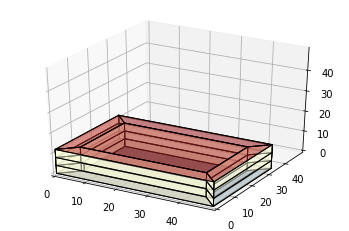

In [145]:
building.view_model()

In [146]:
building.remove_shading()

In [147]:
building.add_overhangs(depth = 1.0, tilt = 70, orientation = "east")

AttributeError: module 'besos.eppy_funcs' has no attribute 'view_geometry'